┌ Info: Recompiling stale cache file /Users/jayyao/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/jayyao/.julia/compiled/v1.0/Interpolations/VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1190


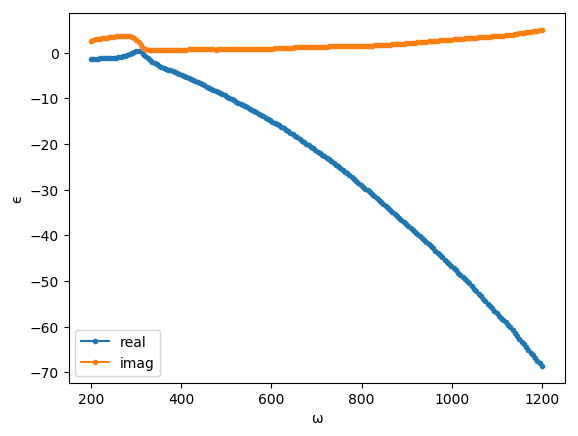

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:27
└ @ Core ./In[2]:27
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:27
└ @ Core ./In[2]:27


PyObject <matplotlib.legend.Legend object at 0x159949278>

In [2]:
using PyPlot, DelimitedFiles, Interpolations
RawData = (open(readdlm,"/Users/jayyao/Documents/Research/LDOS/Materials/METALS_Silver_Palik.txt"))
N = size(RawData)[1]-1

Lambda = RawData[2:end,1]
n = RawData[2:end,2]
k = RawData[2:end,3]

Omega = 2*π*3e8./Lambda*1e6
Epsilon = (n+1im*k).^2

A_x = Omega[end:-1:1]
knots = (A_x,)
Εr = real(Epsilon[end:-1:1])
Εi = imag(Epsilon[end:-1:1])
itpr = interpolate(knots, Εr, Gridded(Linear()))
itpi = interpolate(knots, Εi, Gridded(Linear()))
N = 200
lambda = range(200,stop=1200,length=N)/1e9
omega = zeros(N)
epsilon = zeros(Complex,N)
d = 10e-9
for i=1:N
    k = 2*π/lambda[i]
    ω = k*3e8
    omega[i] = ω
    ϵ = itpr[ω]+itpi[ω]*1im-1
    epsilon[i] = ϵ
end
plot(lambda*1e9,real(epsilon),".-",label="real")
#plot([200,400],[0.5,0.5])
#lambdap = 334
#plot([lambdap,lambdap],[0.0,0.65])
plot(lambda*1e9,imag(epsilon),".-",label="imag")
#xlim([300,350])
xlabel("ω")
ylabel("ϵ")
legend()

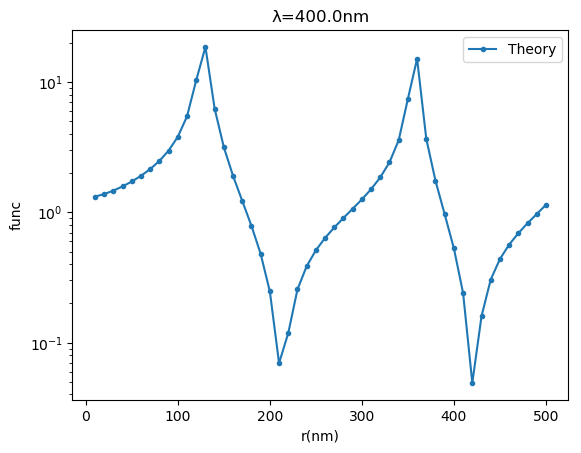

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6


PyObject <matplotlib.legend.Legend object at 0x1469b67f0>

In [73]:
using JLD, SpecialFunctions
ρe = load("/Users/jayyao/Documents/Research/LDOS/Program/LDOS02/Sphere_lambda_300_800_d_10_500.jld", "ρe")
λ0 = 400e-9
k0 = 2*π/λ0
ω = k0*3e8
ϵm = itpr[ω]+itpi[ω]*1im
#ϵm = -1.0+0im
ϵd = 1
km = sqrt(ϵm)*k0
kd = sqrt(ϵd)*k0
#a = 1
l = 1
λ=1e-9

fm(x) = ϵm*hankelh1(l+0.5,km*λ*x)*(kd*λ*x*(besselj(l-0.5,kd*λ*x)-besselj(l+1.5,kd*λ*x))+besselj(l+0.5,kd*λ*x))
fd(x) = ϵd*besselj(l+0.5,kd*λ*x)*(km*λ*x*(hankelh1(l-0.5,km*λ*x)-hankelh1(l+1.5,km*λ*x))+hankelh1(l+0.5,km*λ*x))

Na = 50
aA = range(10,stop=500,length=Na)
func2 = zeros(Na)
for i=1:Na
    aa = aA[i]
    func2[i] = 1/abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))
end
semilogy(aA,func2[:],".-",label="Theory")
#semilogy(a,ρe[3,:,1,1],".-",label="Simulation")
xlabel("r(nm)")
ylabel("func")
title("λ=$(λ0*1e9)nm")
legend()


In [83]:
aa = 128
abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))

0.048171001854119926

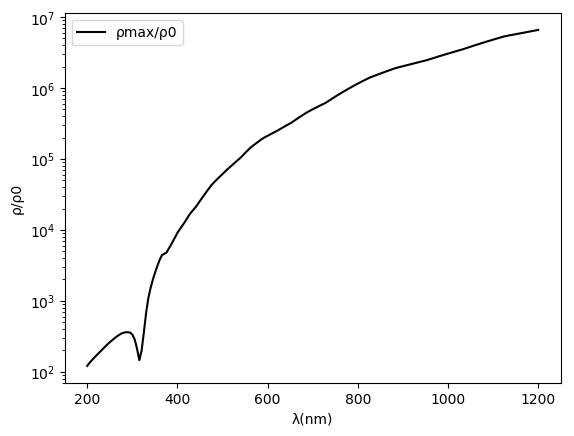

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10


PyObject <matplotlib.legend.Legend object at 0x13a325a90>

In [45]:
Nh = 100
Nd = 1
N = 200
lambda = range(200,stop=1200,length=N)/1e9
ρmax = zeros(N)
for i=1:N
    k = 2*π/lambda[i]
    d = 10e-9
    ω = k*3e8
    ϵ = itpr[ω]+itpi[ω]*1im
    χ = ϵ - 1
    ρmax[i] = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
end

figure(1)
semilogy(lambda*1e9,ρmax,"k-",label="ρmax/ρ0")
#ylim([2,10^3])
#xlim([200,600])
xlabel("λ(nm)")
ylabel("ρ/ρ0")
legend()

In [4]:
λtest = 550e-9
k = 2*π/λtest
d = 203.5e-9
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5


91.7980925911701

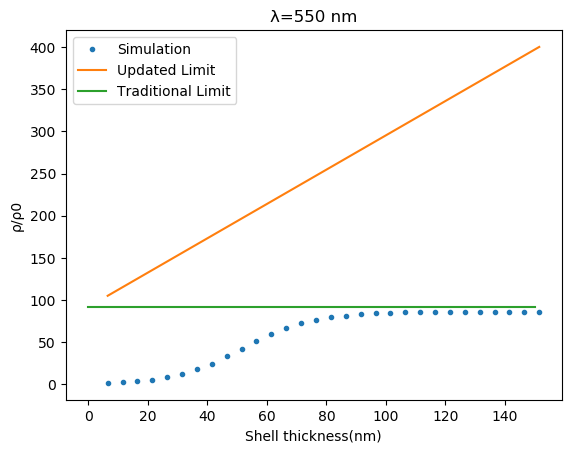

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41


PyObject <matplotlib.legend.Legend object at 0x1471f6048>

In [16]:
#Shell
Data550=[0.21 0.2035 1.71164
0.215 0.2035 2.56629
0.22 0.2035 3.83952
0.225 0.2035 5.72715
0.23 0.2035 8.46805
0.235 0.2035 12.3866
0.24 0.2035 17.6854
0.245 0.2035 24.6482
0.25 0.2035 33.1763
0.255 0.2035 42.4262
0.26 0.2035 51.8841
0.265 0.2035 60.2041
0.27 0.2035 67.089
0.275 0.2035 72.4793
0.28 0.2035 76.5907
0.285 0.2035 79.5634
0.29 0.2035 81.5905
0.295 0.2035 82.9903
0.3 0.2035 84.0981
0.305 0.2035 84.8757
0.31 0.2035 85.2174
0.315 0.2035 85.6322
0.32 0.2035 85.8447
0.325 0.2035 85.996
0.33 0.2035 86.1364
0.335 0.2035 86.1581
0.34 0.2035 86.1845
0.345 0.2035 86.2641
0.35 0.2035 86.2921
0.355 0.2035 86.2576]
d1 = Data550[:,1]
d2 = Data550[:,2]
ρd = Data550[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 550e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=550 nm")
legend()

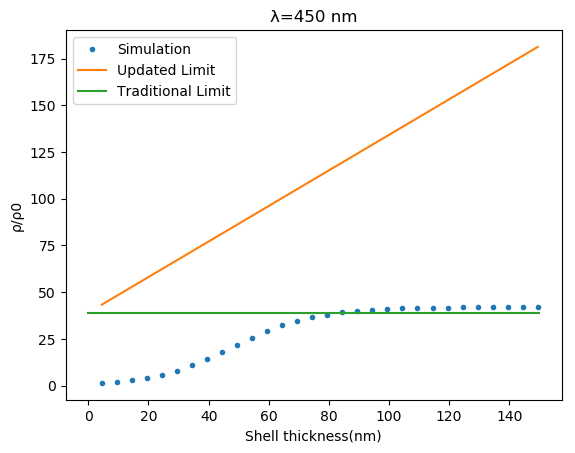

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41


PyObject <matplotlib.legend.Legend object at 0x147564be0>

In [18]:
#Shell
Data450=[0.16 0.1555 1.40688
0.165 0.1555 2.03576
0.17 0.1555 2.92071
0.175 0.1555 4.14975
0.18 0.1555 5.80794
0.185 0.1555 7.99956
0.19 0.1555 10.7772
0.195 0.1555 14.1043
0.2 0.1555 17.8632
0.205 0.1555 21.8028
0.21 0.1555 25.6692
0.215 0.1555 29.1635
0.22 0.1555 32.1762
0.225 0.1555 34.6178
0.23 0.1555 36.5566
0.235 0.1555 38.0216
0.24 0.1555 39.1292
0.245 0.1555 39.9421
0.25 0.1555 40.5365
0.255 0.1555 40.9649
0.26 0.1555 41.2738
0.265 0.1555 41.4948
0.27 0.1555 41.6519
0.275 0.1555 41.7655
0.28 0.1555 41.8454
0.285 0.1555 41.9018
0.29 0.1555 41.9424
0.295 0.1555 41.9711
0.3 0.1555 41.9911
0.305 0.1555 42.0059]
d1 = Data450[:,1]
d2 = Data450[:,2]
ρd = Data450[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 450e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=450 nm")
legend()

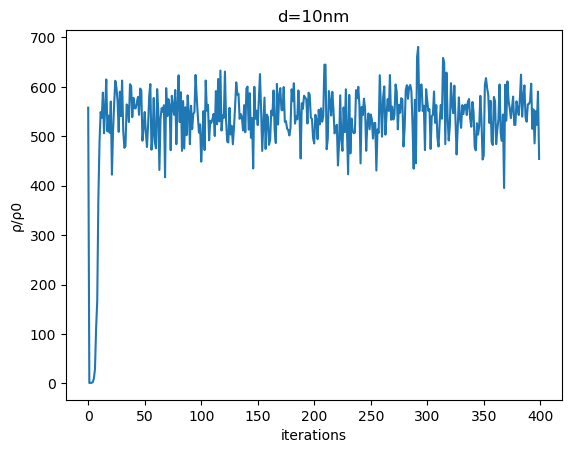

PyObject Text(0.5, 1.0, 'd=10nm')

In [23]:
Data = [#1 rho_s 
#2 coeffs 
557.89 0.01 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1.0205 0.01 -1.8 2 -1.8 -0.8 1.8 1.8 -1.8 1.8 -1.8 -1.8 1.8 1.8 -1.8 1.8 -1.8 -1.8 1.8 1.8 -1.8 -1.8 -1.8 1.8 -1.8 -1.8 1.8 
1.0185 0.01 -1.8 2 -1.8 -0.8 1.7353 1.51201 -1.8 1.8 -1.8 -1.8 1.73634 1.8 -1.8 1.69106 -1.8 -1.8 1.8 1.69999 -1.75642 -1.8 -1.8 1.8 -1.8 -1.8 1.8 
1.3224 0.01 -1.8 2 -1.8 -0.67962 1.28084 0.845816 -1.8 1.51703 -1.8 -1.63848 1.28322 1.58504 -1.57394 1.18291 -1.8 -1.6831 1.8 1.20218 -1.32979 -1.74874 -1.8 1.74358 -1.8 -1.69776 1.50172 
2.39045 0.01 -1.7229 2 -1.62047 -0.158566 0.532989 0.204655 -1.7163 0.854056 -1.56383 -1.07429 0.535611 0.972268 -0.952112 0.434325 -1.55306 -1.16594 1.44031 0.452371 -0.589217 -1.31183 -1.63231 1.29987 -1.6007 -1.19734 0.829152 
9.77286 0.01 -1.2528 1.48359 -1.03899 0.587572 0.0903178 0.024772 -1.23804 0.20869 -0.934044 -0.343854 0.0910203 0.274171 -0.261933 0.0662538 -0.9151 -0.418953 0.735362 0.0703279 -0.106178 -0.568023 -1.06209 0.554269 -1.00131 -0.447782 0.196687 
28.4949 0.01 -0.747903 1.15259 -0.522281 0.877383 0.0206287 0.00537052 -0.730562 0.052445 -0.430502 -0.0965647 0.0208008 0.072693 -0.0687541 0.0148445 -0.415166 -0.125237 0.286885 0.0158086 -0.0245611 -0.192421 -0.544092 0.1856 -0.487971 -0.137119 0.0489482 
111.746 0.01 -0.389848 1.0534 -0.234887 0.957961 0.00659478 0.00169905 -0.376598 0.0171358 -0.182057 -0.0325203 0.0066506 0.0240836 -0.0227171 0.00472688 -0.173764 -0.0430139 0.110059 0.00503719 -0.00787312 -0.069203 -0.248273 0.0664384 -0.214484 -0.0474799 0.0159549 
167.307 0.01 -0.187101 1.0209 -0.102739 0.983664 0.00250696 0.00064392 -0.179331 0.0065568 -0.077112 -0.0125629 0.00252826 0.00925512 -0.00872261 0.00179481 -0.0732276 -0.016725 0.044603 0.001913 -0.00299528 -0.0273476 -0.109478 0.0262103 -0.0926595 -0.0185126 0.00610049 
373.527 0.01 -0.0852604 1.00864 -0.0445819 0.993262 0.00102563 0.000263146 -0.0813547 0.0026889 -0.0329639 -0.00517027 0.00103436 0.00380152 -0.00358167 0.000733969 -0.0312322 -0.00690015 0.0187064 0.000782358 -0.00122576 -0.0113536 -0.0476935 0.0108741 -0.0399722 -0.00764572 0.0025011 
487.208 0.01 -0.0381018 1.0037 -0.0194674 0.997121 0.000436828 0.000112028 -0.0362759 0.00114633 -0.014299 -0.00220733 0.000440548 0.0016217 -0.00152772 0.000312554 -0.0135344 -0.00294879 0.00804851 0.000333169 -0.000522128 -0.00486438 -0.0208631 0.00465768 -0.0174086 -0.00326881 0.00106615 
548.867 0.01 -0.0169628 1.00161 -0.00857657 0.998743 0.000190397 4.88198e-05 -0.0161334 0.000499843 -0.00628127 -0.000963052 0.000192019 0.00070731 -0.000666284 0.000136221 -0.00594285 -0.00128709 0.00352313 0.000145207 -0.000227587 -0.0021255 -0.00919869 0.00203494 -0.00766066 -0.00142703 0.00046486 
537.38 0.01 -0.0076708 1.00072 -0.00386057 0.999437 8.53078e-05 2.18721e-05 -0.0072924 0.000223994 -0.00282382 -0.000431682 8.60346e-05 0.000317002 -0.000298609 6.10324e-05 -0.00267118 -0.000577032 0.00158145 6.5059e-05 -0.000101973 -0.000953354 -0.00414203 0.000912691 -0.00344655 -0.00063982 0.000208314 
588.258 0.01 -0.00335806 1.00032 -0.00168642 0.999754 3.71859e-05 9.5338e-06 -0.00319173 9.76475e-05 -0.00123281 -0.000188208 3.75028e-05 0.000138201 -0.00013018 2.66039e-05 -0.00116607 -0.0002516 0.000689943 2.83591e-05 -4.44508e-05 -0.000415774 -0.00180966 0.000398031 -0.00150522 -0.000278987 9.08109e-05 
506 0.01 -0.00469926 1.00022 -0.00127624 0.999812 2.79077e-05 0.000285452 -0.00394359 -0.000176208 -0.00191914 -0.000154583 6.50264e-05 0.000131661 0.000200319 -2.07749e-05 -0.00104447 -0.000150114 0.00114146 -0.000224494 3.32595e-05 -0.00029287 -0.00212382 0.000318625 -0.00206723 -0.000497993 4.31794e-05 
556.407 0.01 -0.00359341 1.0003 -0.0016145 0.999765 3.55596e-05 5.79084e-05 -0.0033236 4.96347e-05 -0.00135318 -0.000182314 4.23273e-05 0.000137054 -7.22339e-05 1.82989e-05 -0.00114476 -0.00023381 0.000769116 -1.59708e-05 -3.08287e-05 -0.000394229 -0.00186474 0.000384111 -0.00160377 -0.000317382 8.24616e-05 
614.811 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.047 0.01 -0.00369477 1.00031 -0.00168566 0.999767 3.1774e-05 3.30244e-05 -0.00348325 8.10299e-05 -0.00136345 -0.000153365 3.57981e-05 0.00022165 -7.5492e-05 -5.82136e-05 -0.0011939 -0.000226254 0.000771132 2.15187e-05 -5.87025e-05 -0.000399969 -0.00198081 0.000389935 -0.00164278 -0.000297112 8.55919e-05 
541.729 0.01 -0.00341307 1.00031 -0.00167983 0.999757 3.64973e-05 1.62677e-05 -0.00323284 9.16337e-05 -0.00125679 -0.00018419 3.77696e-05 0.000146442 -0.000119459 1.73687e-05 -0.00116692 -0.000247453 0.000705239 2.36569e-05 -4.46413e-05 -0.000412241 -0.00183177 0.00039596 -0.00152791 -0.00028428 8.95322e-05 
506.942 0.01 -0.0033849 1.00031 -0.00167924 0.999755 3.69697e-05 1.4592e-05 -0.00320779 9.26941e-05 -0.00124612 -0.000187272 3.79668e-05 0.000138921 -0.000123856 2.49276e-05 -0.00116423 -0.000249573 0.00069865 2.38707e-05 -4.32351e-05 -0.000413468 -0.00181686 0.000396562 -0.00151642 -0.000282996 8.99263e-05 
570.241 0.01 -0.00338208 1.00031 -0.00167919 0.999755 3.70169e-05 1.44244e-05 -0.00320529 9.28001e-05 -0.00124506 -0.000187581 3.79865e-05 0.000138169 -0.000124295 2.56835e-05 -0.00116396 -0.000249785 0.000697991 2.38921e-05 -4.30945e-05 -0.00041359 -0.00181537 0.000396622 -0.00151527 -0.000282868 8.99657e-05 
422.347 0.01 -0.0033818 1.00031 -0.00167918 0.999755 3.70216e-05 1.44077e-05 -0.00320504 9.28107e-05 -0.00124495 -0.000187611 3.79885e-05 0.000138093 -0.000124339 2.57591e-05 -0.00116393 -0.000249806 0.000697925 2.38942e-05 -4.30805e-05 -0.000413603 -0.00181522 0.000396628 -0.00151516 -0.000282855 8.99696e-05 
511.006 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70221e-05 1.4406e-05 -0.00320501 9.28118e-05 -0.00124494 -0.000187615 3.79886e-05 0.000138086 -0.000124344 2.57666e-05 -0.00116393 -0.000249808 0.000697918 2.38945e-05 -4.30791e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.997e-05 
567.541 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57674e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.177 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
598.341 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.457 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.825 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.596 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.607 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.126 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
476.516 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
480.184 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
564.389 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
528.796 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.275 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
601.734 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.525 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.674 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.653 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.343 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
567.948 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.463 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.376 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
596.49 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.515 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.041 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.201 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.982 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.713 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
478.229 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.203 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.033 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.531 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.695 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
501.65 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.461 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
486.966 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
475.584 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
595.383 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.197 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
431.774 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.278 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.906 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
549.388 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.736 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
417.006 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.301 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.55 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.043 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.885 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
471.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
581.833 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.036 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.506 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.942 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.095 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.189 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
528.674 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
589.004 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.461 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.23 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
475.191 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.66 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
502.054 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.542 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
549.083 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.942 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.647 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.395 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
545.124 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.953 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.388 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.309 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
524.016 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
448.511 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
497.023 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.773 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.077 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.678 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.818 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.579 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.705 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.287 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.231 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.449 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
545.189 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
500.453 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.335 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
524.127 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
615.799 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.992 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
632.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.558 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.07 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.967 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
630.787 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
532.693 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
489.099 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
487.439 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
557.453 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.549 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
521.054 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.686 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.608 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
560.46 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
609.068 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
584.227 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
585.978 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.266 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.867 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.195 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.713 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.897 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.038 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
596.511 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.407 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.412 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
587.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
496.981 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.777 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
434.861 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.993 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.268 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.677 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.478 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.898 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
625.732 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.512 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.334 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.18 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
474.25 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.654 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
539.209 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
482.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
492.669 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.771 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.26 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.58 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.423 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
486.184 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.832 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.745 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.766 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.47 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
552.492 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.53 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.001 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
530.533 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
515.473 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
512.367 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
501.536 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.414 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
594.896 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.868 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
607.199 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.466 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.775 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.034 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.624 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.567 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
455.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
566.706 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
555.403 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.068 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.136 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
574.811 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.749 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
588.055 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
584.225 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
537.384 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.443 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
495.961 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.42 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.471 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.262 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
494.147 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.447 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.883 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.396 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.319 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.411 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
644.737 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
644.718 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
473.652 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
494.488 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.373 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.501 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.843 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
589.854 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.444 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.704 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.56 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.255 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
440.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.51 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.847 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
493.509 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.364 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.229 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.102 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
594.941 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.219 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
422.989 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
583.516 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
465.216 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.762 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.81 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.947 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.264 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.244 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
576.822 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.061 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.12 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
445.112 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.401 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.67 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.928 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.185 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.481 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.216 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
546.084 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.108 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.94 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.031 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
495.267 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.602 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.979 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
430.583 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.878 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
506.938 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.41 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.248 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
499.095 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.053 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.743 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.152 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.197 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.106 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.267 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.787 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.44 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.893 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.731 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.263 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.671 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.493 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.012 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
547.376 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.047 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
574.863 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
479.248 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.646 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.217 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.726 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.821 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.653 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.081 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
521.731 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
434.409 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
573.738 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
445.296 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
660.207 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
680.675 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.6 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
601.957 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.793 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.864 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.683 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
595.234 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
572.092 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.241 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.843 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
474.31 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.933 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.319 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.428 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.03 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.91 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
497.691 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
479.172 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.285 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.276 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.363 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
658.404 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
648.659 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.904 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
628.756 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.661 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.468 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
519.935 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
607.432 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
565.711 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
546.614 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
602.368 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
530.558 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
463.171 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.883 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.619 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.056 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.97 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.927 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.749 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.37 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.979 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.98 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
569.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.237 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.441 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
519.246 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
569.317 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.941 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
478.219 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
471.405 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.346 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.306 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
520.215 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
581.642 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.779 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
453.01 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
460.569 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.635 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
617.611 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.469 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
583.407 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.901 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.714 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
488.246 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
482.322 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.544 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.961 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
484.133 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.025 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.401 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.733 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.521 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
490.669 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.078 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
395.278 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.212 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.542 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
611.015 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.243 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.637 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.593 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
557.256 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
580.213 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.871 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.987 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.579 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.887 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.932 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
576.239 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
624.587 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
539.72 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.416 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
602.848 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.38 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
564.468 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
565.323 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.445 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
606.304 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.936 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.323 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.551 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.593 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.315 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.163 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
454.009 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
]
ρ10 = Data[:,1]
plot(ρ10)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=10nm")

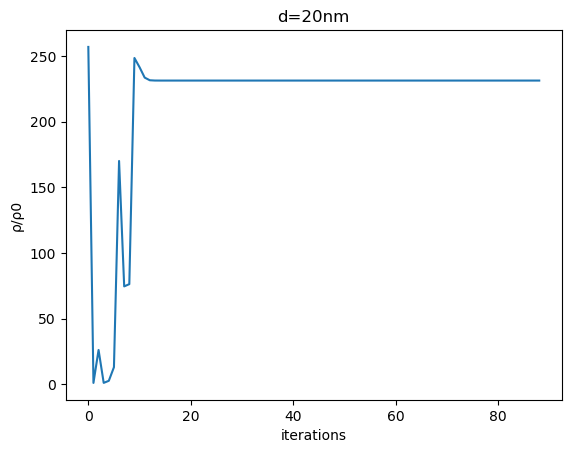

PyObject Text(0.5, 1.0, 'd=20nm')

In [10]:
Data = [257.06 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
0.933125 0.02 1.55843 -1.80365 1.79671 2 -1.79361 1.8087 1.83929 -1.7564 1.68181 1.12415 -1.81559 -1.84624 1.82532 2 -1.1935 2 -1.8193 1.79372 -1.82161 1.82281 1.84696 1.80676 -1.78823 1.81762 -1.81069 
26.0391 0.02 0.922064 -1.55888 1.59892 2 -1.39758 1.55183 1.7552 -1.3446 1.17424 0.384849 -1.49809 -1.77588 1.68746 2 -0.444203 2 -1.73355 1.52718 -1.64003 1.6907 1.84696 1.51731 -1.38717 1.53099 -1.57759 
0.968343 0.02 0.245964 -0.922542 1.00087 2 -0.670526 0.906632 1.27646 -0.60986 0.425568 0.0633723 -0.814372 -1.31421 1.14747 1.94878 -0.0689046 2 -1.25278 0.875175 -1.05663 1.15684 1.53985 0.850193 -0.657501 0.86566 -0.950182 
2.54379 0.02 0.0354459 -0.257374 0.303818 2 -0.148746 0.250549 0.543021 -0.110946 0.060339 0.0154994 -0.207184 -0.582655 0.421642 1.39303 -0.00825933 1.54844 -0.519238 0.226559 -0.350215 0.429227 0.881475 0.219834 -0.143014 0.233017 -0.276546 
12.9238 0.02 0.0100756 -0.0681733 0.0783488 2 -0.0459016 0.0695996 0.197321 -0.0169388 0.0055961 0.0107604 -0.0618813 -0.219273 0.138852 0.866318 -0.0021682 1.02265 -0.175637 0.0519188 -0.110545 0.140226 0.394319 0.0591576 -0.0430778 0.0706936 -0.0789812 
170.121 0.02 0.00508747 -0.0218837 0.0200725 2 -0.023593 0.025861 0.0871321 0.00321707 -0.00556529 0.00985163 -0.028496 -0.099211 0.0585818 0.540875 -0.00099819 0.663584 -0.0665713 0.01009 -0.047197 0.0573067 0.167987 0.0214346 -0.0214832 0.0324948 -0.0300422 
74.5266 0.02 0.00383813 -0.0096582 0.00443484 1.97445 -0.0178815 0.0143478 0.0553698 0.00836324 -0.00838263 0.00962517 -0.0198259 -0.0641079 0.036392 0.403746 -0.000706544 0.498967 -0.0351831 -0.000892999 -0.0300828 0.0343009 0.0897005 0.0115827 -0.0159595 0.0225124 -0.0170718 
76.2374 0.02 0.00341983 -0.00550398 -0.00090349 1.90359 -0.0159578 0.0104394 0.0442837 0.0100953 -0.0093279 0.00954945 -0.0168939 -0.0517985 0.0287488 0.347642 -0.000609021 0.428406 -0.0242332 -0.00461872 -0.0242287 0.0263677 0.0604861 0.00824571 -0.0140995 0.0191306 -0.01266 
248.622 0.02 0.00327196 -0.00402795 -0.00280332 1.8759 -0.0152763 0.00905116 0.0403072 0.0107087 -0.00966231 0.0095227 -0.0158539 -0.0473758 0.0260202 0.326194 -0.00057456 0.40085 -0.0203064 -0.00594174 -0.0221438 0.0235344 0.0497399 0.00706137 -0.0134406 0.0179303 -0.0110919 
241.572 0.02 0.00324775 -0.00378594 -0.00311496 1.87122 -0.0151647 0.00882357 0.0396534 0.0108091 -0.00971706 0.00951832 -0.0156834 -0.0466482 0.0255721 0.322594 -0.00056892 0.396191 -0.0196607 -0.00615862 -0.0218017 0.0230691 0.0479588 0.00686726 -0.0133327 0.0177336 -0.0108348 
233.672 0.02 0.00323686 -0.00367705 -0.00325519 1.8691 -0.0151145 0.00872118 0.039359 0.0108543 -0.00974169 0.00951635 -0.0156068 -0.0463206 0.0253705 0.320967 -0.000566383 0.394081 -0.01937 -0.00625619 -0.0216478 0.0228597 0.0471556 0.00677992 -0.0132842 0.0176451 -0.0107191 
231.644 0.02 0.00323453 -0.0036537 -0.00328528 1.86864 -0.0151037 0.00869921 0.0392958 0.010864 -0.00974697 0.00951593 -0.0155903 -0.0462503 0.0253272 0.320617 -0.000565838 0.393627 -0.0193076 -0.00627712 -0.0216148 0.0228148 0.0469832 0.00676119 -0.0132738 0.0176261 -0.0106943 
231.435 0.02 0.0032343 -0.00365136 -0.00328829 1.8686 -0.0151026 0.00869701 0.0392895 0.010865 -0.0097475 0.00951588 -0.0155887 -0.0462433 0.0253229 0.320582 -0.000565784 0.393582 -0.0193014 -0.00627922 -0.0216115 0.0228103 0.0469659 0.00675932 -0.0132727 0.0176242 -0.0106918 
231.414 0.02 0.00323427 -0.00365113 -0.00328859 1.86859 -0.0151025 0.00869679 0.0392889 0.0108651 -0.00974755 0.00951588 -0.0155885 -0.0462426 0.0253224 0.320578 -0.000565779 0.393578 -0.0193008 -0.00627943 -0.0216111 0.0228098 0.0469642 0.00675913 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
231.412 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0108651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
]
ρ20 = Data[:,1]
plot(ρ20)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=20nm")

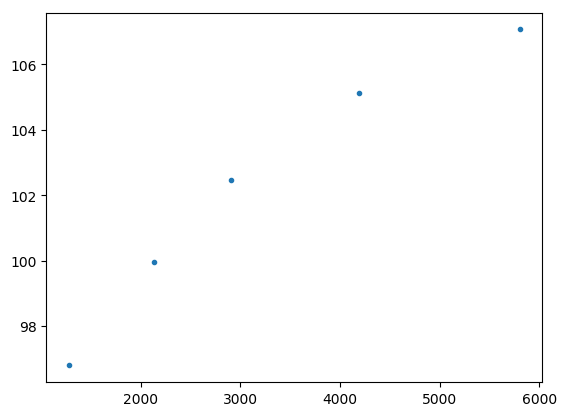

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16cb1d780>

In [9]:
resolution=[2906 1276 2136 4194 5804]
rho=[102.48 96.7989 99.9697 105.139 107.066]
plot(resolution[:],rho[:],".")

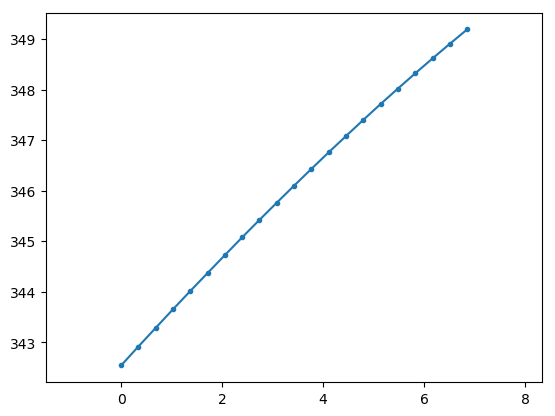

(-0.34253900000000004, 7.193319000000001, 342.2064, 349.5236)

In [11]:
using PyPlot
Data = [342.539 0.02 0.014952 0.101011 -0.101643 1.61261 -0.0380403 0.00105417 0.0812164 0.0093916 0.00495769 0.0855511 -0.0968042 -0.0451337 -0.0184538 0.182916 0.0914557 0.39994 -0.0469415 -0.0697824 -0.174115 0.123422 0.255014 0.0235747 -0.0182964 0.0083429 0.0322651 
342.914 0.02 0.0149512 0.101009 -0.101649 1.61265 -0.0380455 0.00105132 0.0812406 0.00938573 0.00495852 0.0855647 -0.0968049 -0.045137 -0.0184527 0.182932 0.0914549 0.399964 -0.0469395 -0.069789 -0.174151 0.12345 0.2551 0.0235862 -0.018296 0.00834046 0.0322694 
343.283 0.02 0.0149505 0.101007 -0.101654 1.61269 -0.0380507 0.00104848 0.0812647 0.00937987 0.00495935 0.0855783 -0.0968057 -0.0451402 -0.0184517 0.182949 0.0914541 0.399987 -0.0469376 -0.0697957 -0.174187 0.123477 0.255186 0.0235977 -0.0182955 0.00833801 0.0322737 
343.651 0.02 0.0149497 0.101005 -0.10166 1.61273 -0.0380559 0.00104563 0.0812889 0.009374 0.00496018 0.0855919 -0.0968064 -0.0451435 -0.0184506 0.182965 0.0914533 0.400011 -0.0469356 -0.0698023 -0.174224 0.123505 0.255272 0.0236092 -0.0182951 0.00833557 0.032278 
344.013 0.02 0.014949 0.101003 -0.101665 1.61277 -0.0380611 0.00104279 0.081313 0.00936813 0.00496102 0.0856056 -0.0968072 -0.0451467 -0.0184496 0.182981 0.0914525 0.400035 -0.0469337 -0.069809 -0.17426 0.123533 0.255358 0.0236207 -0.0182947 0.00833313 0.0322822 
344.369 0.0200001 0.0149482 0.101001 -0.101671 1.6128 -0.0380664 0.00103994 0.0813372 0.00936227 0.00496185 0.0856192 -0.0968079 -0.04515 -0.0184485 0.182997 0.0914517 0.400059 -0.0469317 -0.0698156 -0.174296 0.12356 0.255444 0.0236322 -0.0182942 0.00833068 0.0322865 
344.724 0.0200001 0.0149475 0.100998 -0.101676 1.61284 -0.0380716 0.00103709 0.0813614 0.0093564 0.00496268 0.0856328 -0.0968086 -0.0451532 -0.0184474 0.183014 0.0914509 0.400082 -0.0469297 -0.0698223 -0.174332 0.123588 0.25553 0.0236437 -0.0182938 0.00832824 0.0322908 
345.076 0.0200001 0.0149467 0.100996 -0.101682 1.61288 -0.0380768 0.00103425 0.0813855 0.00935054 0.00496351 0.0856464 -0.0968094 -0.0451565 -0.0184464 0.18303 0.0914501 0.400106 -0.0469278 -0.0698289 -0.174368 0.123616 0.255616 0.0236552 -0.0182933 0.0083258 0.0322951 
345.422 0.0200002 0.014946 0.100994 -0.101688 1.61292 -0.038082 0.0010314 0.0814097 0.00934467 0.00496434 0.08566 -0.0968101 -0.0451597 -0.0184453 0.183046 0.0914493 0.40013 -0.0469258 -0.0698356 -0.174405 0.123643 0.255702 0.0236668 -0.0182929 0.00832336 0.0322994 
345.762 0.0200003 0.0149452 0.100992 -0.101693 1.61296 -0.0380872 0.00102855 0.0814339 0.0093388 0.00496517 0.0856736 -0.0968109 -0.045163 -0.0184442 0.183062 0.0914485 0.400153 -0.0469238 -0.0698422 -0.174441 0.123671 0.255788 0.0236783 -0.0182925 0.00832091 0.0323037 
346.099 0.0200004 0.0149445 0.10099 -0.101699 1.613 -0.0380924 0.00102571 0.081458 0.00933294 0.004966 0.0856873 -0.0968116 -0.0451662 -0.0184432 0.183079 0.0914477 0.400177 -0.0469219 -0.0698488 -0.174477 0.123699 0.255874 0.0236898 -0.018292 0.00831847 0.0323079 
346.431 0.0200005 0.0149437 0.100988 -0.101704 1.61304 -0.0380976 0.00102286 0.0814822 0.00932707 0.00496683 0.0857009 -0.0968124 -0.0451695 -0.0184421 0.183095 0.0914469 0.400201 -0.0469199 -0.0698555 -0.174513 0.123726 0.25596 0.0237013 -0.0182916 0.00831603 0.0323122 
346.759 0.0200006 0.0149429 0.100986 -0.10171 1.61308 -0.0381028 0.00102002 0.0815063 0.0093212 0.00496767 0.0857145 -0.0968131 -0.0451727 -0.0184411 0.183111 0.0914461 0.400225 -0.046918 -0.0698621 -0.174549 0.123754 0.256046 0.0237128 -0.0182912 0.00831358 0.0323165 
347.081 0.0200008 0.0149422 0.100984 -0.101716 1.61312 -0.038108 0.00101717 0.0815305 0.00931534 0.0049685 0.0857281 -0.0968138 -0.045176 -0.01844 0.183128 0.0914453 0.400248 -0.046916 -0.0698688 -0.174585 0.123782 0.256132 0.0237243 -0.0182907 0.00831114 0.0323208 
347.401 0.0200009 0.0149414 0.100982 -0.101721 1.61315 -0.0381133 0.00101432 0.0815547 0.00930947 0.00496933 0.0857417 -0.0968146 -0.0451792 -0.0184389 0.183144 0.0914445 0.400272 -0.046914 -0.0698754 -0.174622 0.123809 0.256218 0.0237358 -0.0182903 0.0083087 0.0323251 
347.715 0.0200012 0.0149407 0.10098 -0.101727 1.61319 -0.0381185 0.00101148 0.0815788 0.00930361 0.00497016 0.0857553 -0.0968153 -0.0451825 -0.0184379 0.18316 0.0914437 0.400296 -0.0469121 -0.0698821 -0.174658 0.123837 0.256304 0.0237473 -0.0182899 0.00830625 0.0323294 
348.021 0.0200014 0.0149399 0.100978 -0.101732 1.61323 -0.0381237 0.00100863 0.081603 0.00929774 0.00497099 0.0857689 -0.0968161 -0.0451857 -0.0184368 0.183176 0.0914429 0.400319 -0.0469101 -0.0698887 -0.174694 0.123865 0.25639 0.0237588 -0.0182894 0.00830381 0.0323336 
348.322 0.0200017 0.0149392 0.100976 -0.101738 1.61327 -0.0381289 0.00100579 0.0816271 0.00929187 0.00497182 0.0857826 -0.0968168 -0.045189 -0.0184357 0.183193 0.0914421 0.400343 -0.0469082 -0.0698954 -0.17473 0.123892 0.256476 0.0237703 -0.018289 0.00830137 0.0323379 
348.617 0.020002 0.0149384 0.100973 -0.101743 1.61331 -0.0381341 0.00100294 0.0816513 0.00928601 0.00497265 0.0857962 -0.0968175 -0.0451922 -0.0184347 0.183209 0.0914413 0.400367 -0.0469062 -0.069902 -0.174766 0.12392 0.256562 0.0237818 -0.0182886 0.00829893 0.0323422 
348.907 0.0200023 0.0149377 0.100971 -0.101749 1.61335 -0.0381393 0.00100009 0.0816755 0.00928014 0.00497348 0.0858098 -0.0968183 -0.0451955 -0.0184336 0.183225 0.0914405 0.400391 -0.0469042 -0.0699086 -0.174803 0.123948 0.256648 0.0237933 -0.0182881 0.00829648 0.0323465 
349.191 0.0200027 0.0149369 0.100969 -0.101755 1.61339 -0.0381445 0.000997247 0.0816996 0.00927427 0.00497432 0.0858234 -0.096819 -0.0451987 -0.0184326 0.183241 0.0914397 0.400414 -0.0469023 -0.0699153 -0.174839 0.123975 0.256734 0.0238048 -0.0182877 0.00829404 0.0323508 
]
alpha =Data[1,1]/1000
Nl = length(Data[:,1])
xx = range(0,stop=(Nl-1),step=1)*alpha
plot(xx,Data[:,1],".-")
axis("equal")

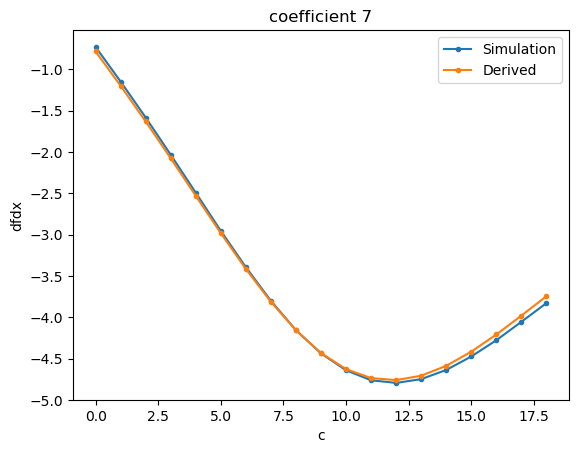

PyObject <matplotlib.legend.Legend object at 0x14753eb38>

In [40]:
Data=[257.494 -57.9172 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0208651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
256.765 -98.8022 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0308651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
255.617 -141.126 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0408651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
254.034 -185.054 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0508651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
252 -230.254 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0608651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
249.507 -275.863 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0708651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
246.552 -320.552 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0808651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
243.158 -362.59 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0908651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
239.357 -400.131 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.100865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
235.201 -431.443 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.110865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
230.764 -455.114 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.120865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
226.123 -470.318 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.130865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
221.361 -476.839 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.140865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
216.567 -475.13 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.150865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
211.819 -466.155 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.160865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
207.182 -451.229 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.170865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
202.708 -431.89 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.180865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
198.431 -409.696 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.190865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
194.377 -386.169 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.200865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
190.549 -362.678 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.210865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
]
rho1=Data[1:end-1,1]
rho2=Data[2:end,1]
g1=Data[1:end-1,2]
g2=Data[2:end,2]
plot(rho2-rho1,".-",label="Simulation")
plot((g2+g1)/2*0.01,".-",label="Derived")
ylabel("dfdx")
xlabel("c")
title("coefficient 7")
legend()